In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
from datetime import datetime

In [5]:
!pip install pandas-datareader

In [7]:
def get_stock_data(ticker,start,end):
    df = pdr.get_data_yahoo(ticker, start = start, end=end)
    return df

In [8]:
ticker = 'HDFC.NS'
start = datetime(2012,1,1)
end = datetime(2017,1,1)
HDFC = get_stock_data(ticker,start,end)
print(HDFC.describe())

              High          Low         Open        Close        Volume  \
count  1229.000000  1229.000000  1229.000000  1229.000000  1.229000e+03   
mean    889.280274   876.446629   883.240281   883.084993  1.902669e+06   
std     200.050652   193.503770   197.065870   196.983759  5.165866e+06   
min     637.500000   610.500000   624.299988   620.900024  0.000000e+00   
25%     816.000000   795.549988   806.000000   805.849976  0.000000e+00   
50%     818.200012   818.200012   818.200012   818.200012  1.611902e+06   
75%     850.000000   833.049988   842.000000   841.549988  2.793400e+06   
max    1464.000000  1442.000000  1464.000000  1458.050049  1.584141e+08   

         Adj Close  
count  1229.000000  
mean    802.638776  
std     197.697344  
min     538.745789  
25%     716.818237  
50%     746.211670  
75%     760.117249  
max    1372.537354  


In [10]:
def stock_features(df):
    df["SMA_5"] = df["Close"].rolling(20).mean()
    df["SMA_20"] = df["Close"].rolling(5).mean()
    df['Long_Entry']=0
    df['Long_Exit']=0
    df['Short_Entry']=0
    df['Short_Exit']=0
    df = df.dropna()
    return df

In [11]:
hdfc = HDFC.copy()
hdfc1 = stock_features(hdfc)
print(hdfc1)

                   High          Low         Open        Close     Volume  \
Date                                                                        
2012-01-30   699.799988   685.000000   692.049988   688.099976  1921884.0   
2012-01-31   701.950012   689.950012   692.500000   697.849976  2647243.0   
2012-02-01   692.000000   680.000000   691.000000   688.900024  4956130.0   
2012-02-02   696.000000   682.799988   696.000000   685.750000  2945430.0   
2012-02-03   699.000000   685.049988   688.000000   696.650024  1518043.0   
...                 ...          ...          ...          ...        ...   
2016-12-26  1224.250000  1206.000000  1220.000000  1219.500000   747342.0   
2016-12-27  1237.000000  1211.449951  1221.900024  1232.150024   872827.0   
2016-12-28  1248.050049  1222.900024  1238.900024  1237.949951  2032787.0   
2016-12-29  1261.550049  1229.900024  1234.699951  1257.199951  2005422.0   
2016-12-30  1269.750000  1249.500000  1263.349976  1262.599976  1388842.0   

In [13]:
def SMA_Strategy(df):
    signal = 0
    ret = []
    
    for i in range(len(df)):
        
        if(signal==0):
            ret.append(0)
    
            #Long_Entry:
            
            if(df['SMA_5'][i] > df['SMA_20'][i]
              and df['SMA_5'][i-1] < df['SMA_20'][i-1]):
                signal = 1
                df['Long_Entry'][i] = df["Close"][i]
                                                  
            #Long_Exit:
        elif (signal==1):
                if(df['SMA_5'][i] > df['Close'][i]
                   and df['SMA_5'][i-1] < df['Close'][i-1]):
                    signal = 0
                    df['Long_Exit'][i] = df["Close"][i]
                    ret.append((df['Close'][i]/df['Close'][i-1]-1))
                else:
                    ret.append((df['Close'][i]/df['Close'][i-1]-1))
                    
    df["ret"] = np.array(ret)
    return df
                
                
                
        

In [14]:
hdfc2 = hdfc1.copy()
hdfc3 = SMA_Strategy(hdfc2)
print(hdfc3)

/Users/aaryashrivastava/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/aaryashrivastava/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                   High          Low         Open        Close     Volume  \
Date                                                                        
2012-01-30   699.799988   685.000000   692.049988   688.099976  1921884.0   
2012-01-31   701.950012   689.950012   692.500000   697.849976  2647243.0   
2012-02-01   692.000000   680.000000   691.000000   688.900024  4956130.0   
2012-02-02   696.000000   682.799988   696.000000   685.750000  2945430.0   
2012-02-03   699.000000   685.049988   688.000000   696.650024  1518043.0   
...                 ...          ...          ...          ...        ...   
2016-12-26  1224.250000  1206.000000  1220.000000  1219.500000   747342.0   
2016-12-27  1237.000000  1211.449951  1221.900024  1232.150024   872827.0   
2016-12-28  1248.050049  1222.900024  1238.900024  1237.949951  2032787.0   
2016-12-29  1261.550049  1229.900024  1234.699951  1257.199951  2005422.0   
2016-12-30  1269.750000  1249.500000  1263.349976  1262.599976  1388842.0   

In [15]:
hdfc3.to_csv("HDFC_week1_SMA.csv")

In [17]:
def CAGR(df):
    df["cum_return"] = (1+ df['ret']).cumprod()
    df['cum_return'].plot(figsize=(15,8),grid=True)
    plt.ylabel('Cumm_Returns')
    plt.xlabel('Date')
    print('Cumm_returns',(df['cum_return'][-1]-1)*100,"%")
    
    n = len(df)/(252)
    CAGR = ((df['cum_return'][-1])**(1/n)-1)
    return CAGR


    

def volatality(df):
    vol = (df['ret'].std()*np.sqrt(252))
    return vol
def sharpe(df,rf):
    sr = (CAGR(df) - rf)/volatality(df)
    return sr
def max_dd(df):
    
    df["cum_return"] = (1 + df['ret']).cumprod()
    df['cum_roll_max'] = df['cum_return'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df["cum_return"]
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

    

Cumm_returns 111.03286397924816 %
Cumm_returns 111.03286397924816 %
   Annual_Return  Volatality  Sharp Ratio  Max Drawdown
0        0.16829    0.270628     0.621849      0.176657


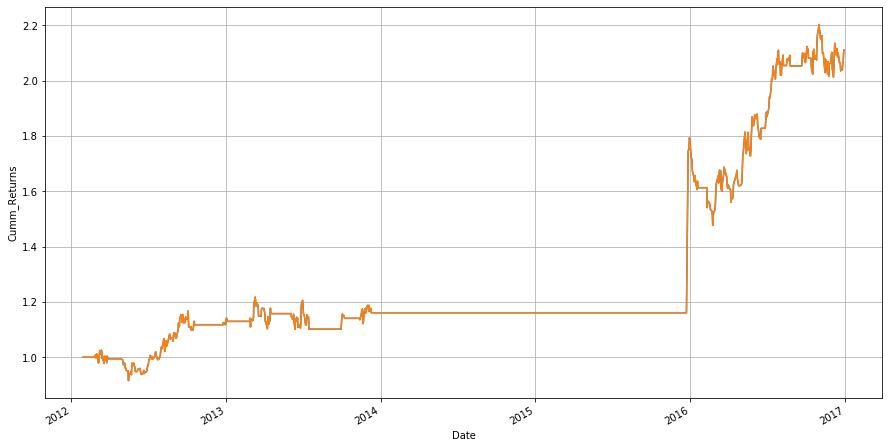

In [18]:
cagr = CAGR(hdfc3)
Volatality = volatality(hdfc3)
sharpe_ratio = sharpe(hdfc3,0.0)
Max_drawdown = max_dd(hdfc3)

Portfolio_df = pd.DataFrame([cagr,Volatality,sharpe_ratio,Max_drawdown],index=['Annual_Return','Volatality','Sharp Ratio','Max Drawdown'])
print(Portfolio_df.T)
